# Data Loading

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [34]:
# Read the data
df = pd.read_csv('train.csv')
df

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-36995,Frederica Shealy,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,...,809.44,0,NaN,746,1933.05,4,Rural,1,119933.46,54607.18
1,C-33999,America Calderone,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,...,780.40,0,Unpossessed,608,4952.91,2,Rural,1,54791.00,37469.98
2,C-3770,Rosetta Verne,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,...,833.15,0,Unpossessed,546,988.19,2,Urban,0,72440.58,36474.43
3,C-26480,Zoe Chitty,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,...,832.70,1,Unpossessed,890,NaN,2,Semi-Urban,1,121441.51,56040.54
4,C-23459,Afton Venema,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,...,745.55,1,Active,715,2614.77,4,Semi-Urban,1,208567.91,74008.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,C-43723,Angelyn Clevenger,M,38,4969.41,Low,Commercial associate,Managers,Urban,76657.90,...,869.61,0,Unpossessed,566,4969.41,4,Urban,1,111096.56,68992.11
29996,C-32511,Silas Slaugh,M,20,1606.88,Low,Working,Laborers,Semi-Urban,66595.14,...,729.41,0,Inactive,175,1606.88,3,Urban,1,73453.94,46616.60
29997,C-5192,Carmelo Lone,F,49,NaN,Low,Working,Sales staff,Urban,81410.08,...,NaN,0,Active,959,NaN,1,Rural,1,102108.02,61057.56
29998,C-12172,Carolann Osby,M,38,2417.71,Low,Working,Security staff,Semi-Urban,142524.10,...,677.27,1,Unpossessed,375,2417.71,4,Urban,1,168194.47,99766.87


# Data Preprocessing

### a. Handling Missing Values

In [35]:
df.isnull().sum()[df.isnull().sum() > 0]


,0
Gender,53
Income (USD),4576
Income Stability,1683
Type of Employment,7270
Current Loan Expenses (USD),172
Dependents,2493
Credit Score,1703
Has Active Credit Card,1566
Property Age,4850
Property Location,356


In [36]:
# Fill categorical columns with mode or default string
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Income Stability'] = df['Income Stability'].fillna(df['Income Stability'].mode()[0])
df['Type of Employment'] = df['Type of Employment'].fillna('Unknown')
df['Has Active Credit Card'] = df['Has Active Credit Card'].fillna('Unknown')
df['Property Location'] = df['Property Location'].fillna(df['Property Location'].mode()[0])

# Fill numerical columns with mean/median
df['Income (USD)'] = df['Income (USD)'].fillna(df['Income (USD)'].mean())
df['Current Loan Expenses (USD)'] = df['Current Loan Expenses (USD)'].fillna(df['Current Loan Expenses (USD)'].mean())
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].median())
df['Dependents'] = df['Dependents'].astype(int)
df['Credit Score'] = df['Credit Score'].fillna(df['Credit Score'].mean())
df['Property Age'] = df['Property Age'].fillna(df['Property Age'].mean())

# Drop rows where target is missing
df = df.dropna(subset=['Loan Sanction Amount (USD)'])


In [37]:
df.isnull().sum()


,0
Customer ID,0
Name,0
Gender,0
Age,0
Income (USD),0
Income Stability,0
Profession,0
Type of Employment,0
Location,0
Loan Amount Request (USD),0


In [38]:
print("Data shape after handling null values:", df.shape)


Data shape after handling null values: (29660, 24)


### b. Handling Outliers

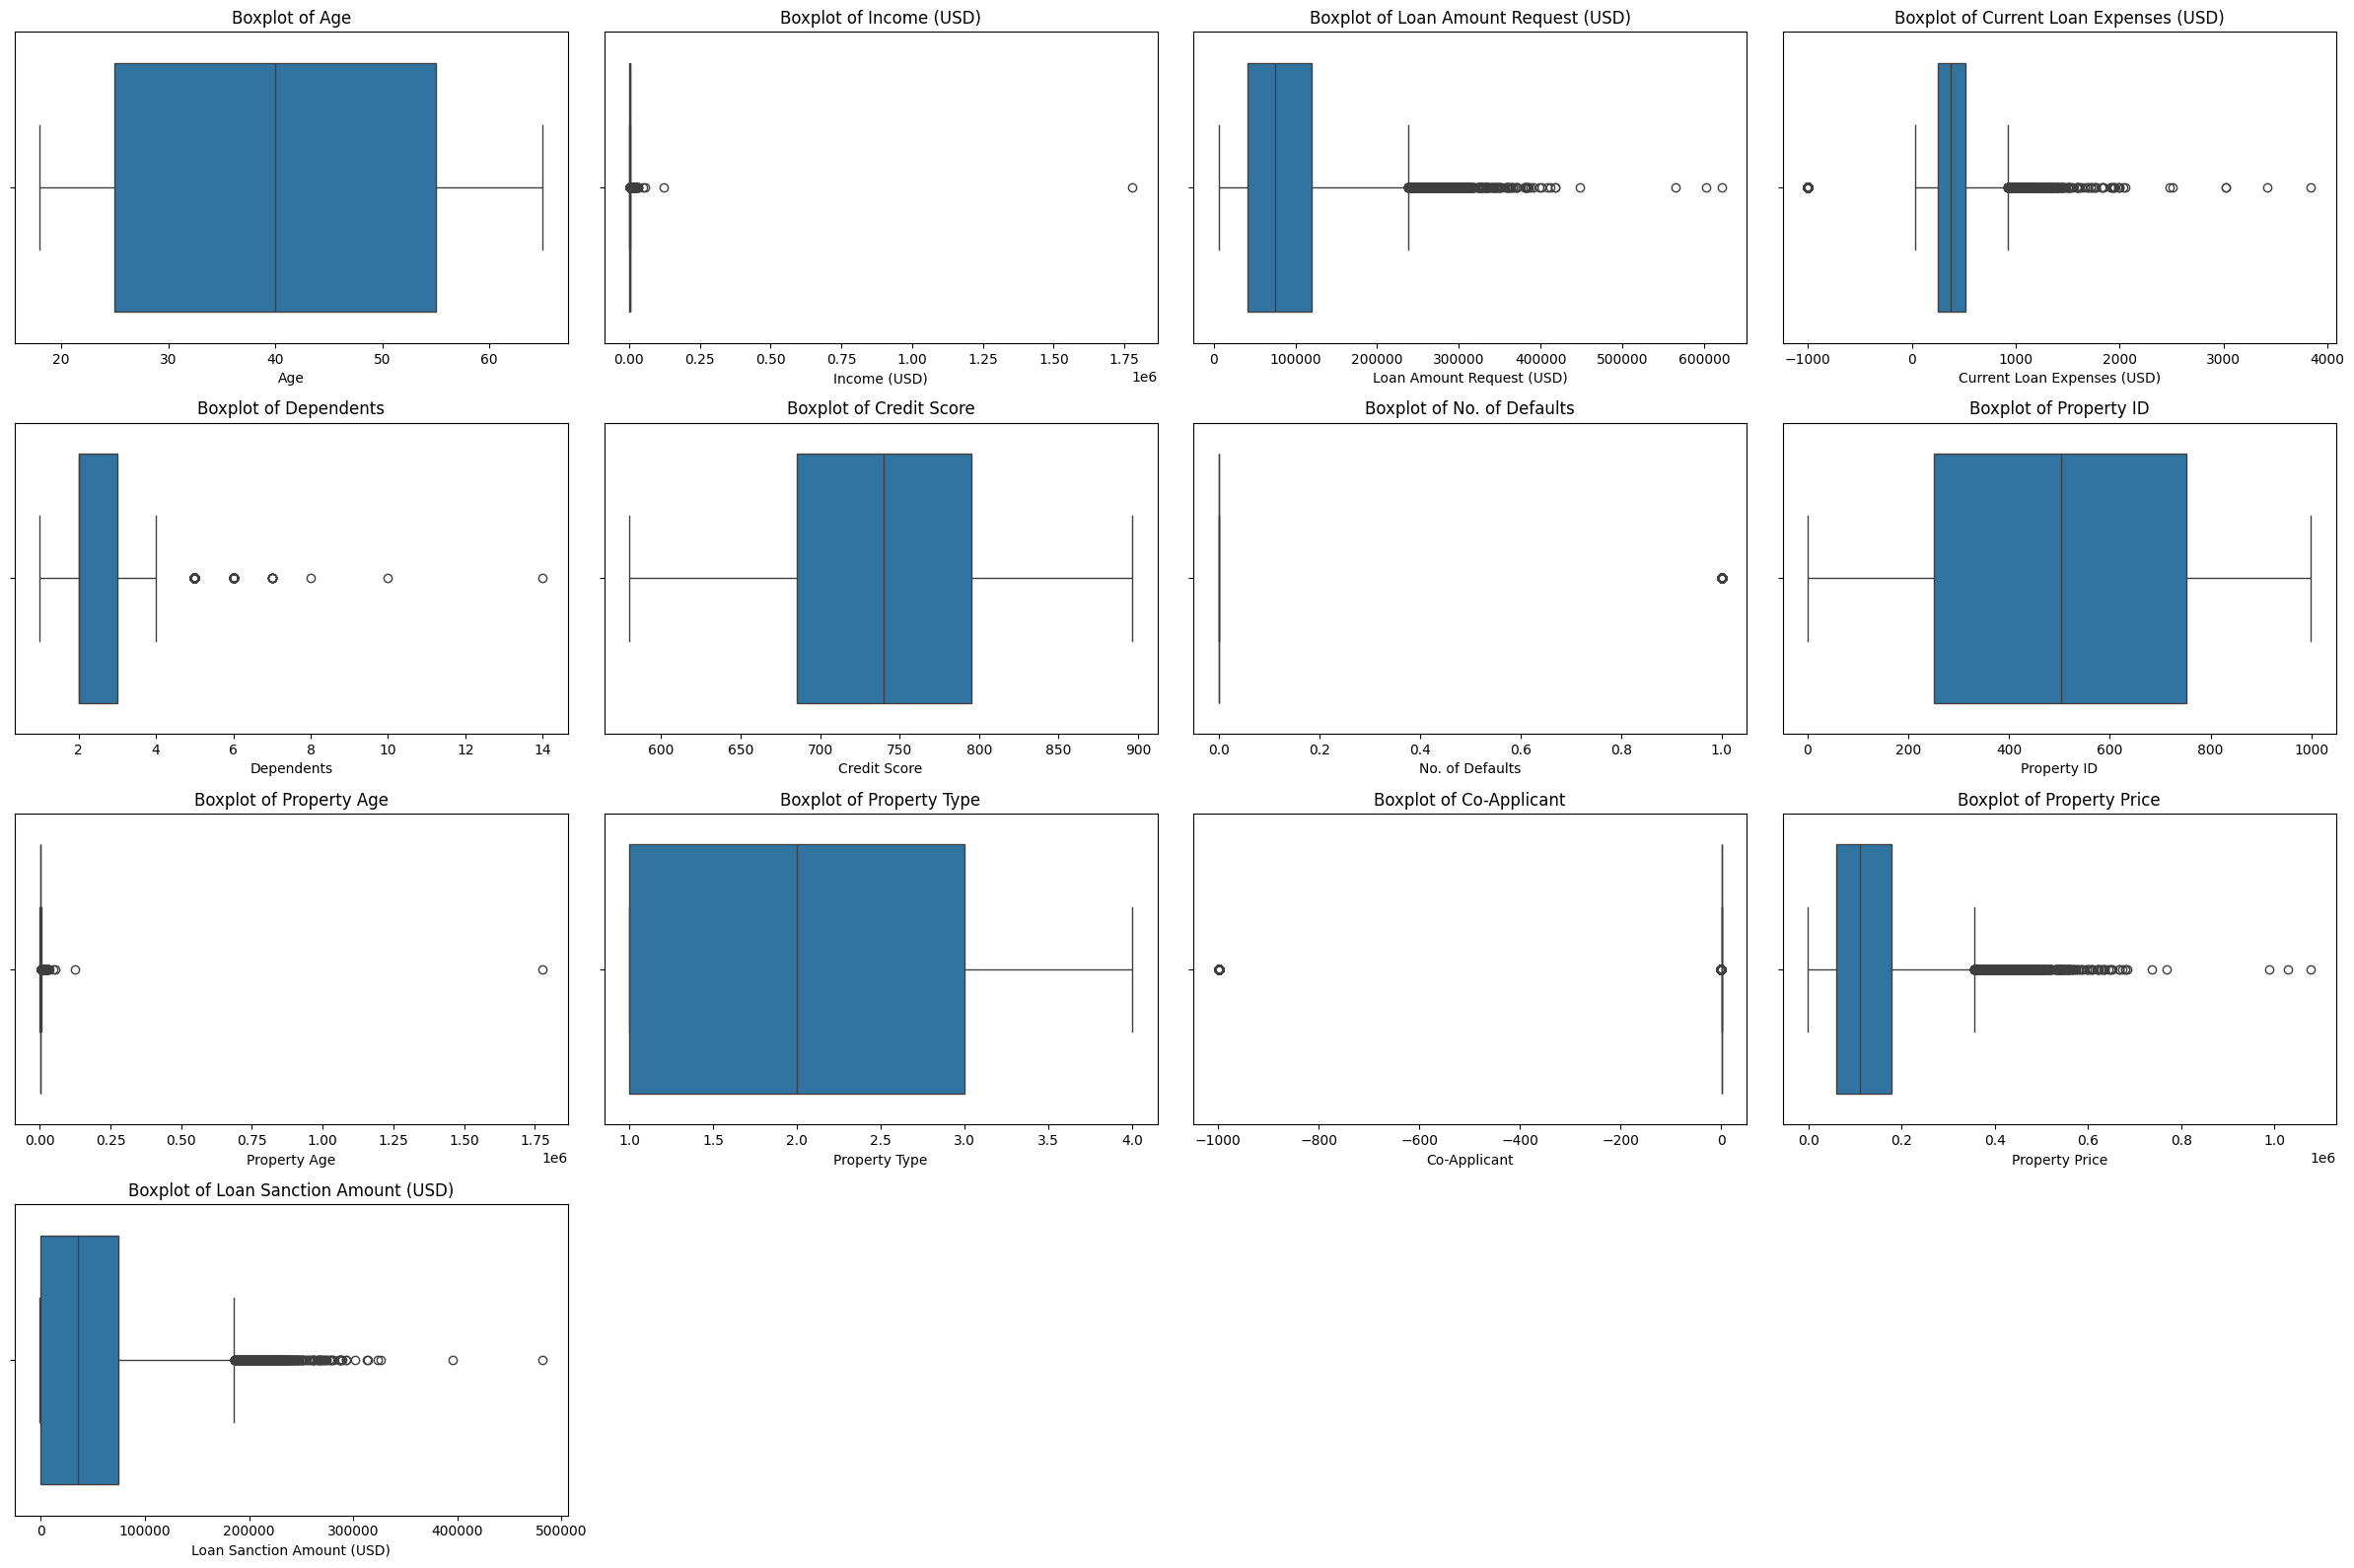

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cols = 4
rows = 4

plt.figure(figsize=(6 * cols, 4 * rows))

for i, col in enumerate(num_cols):
    plt.subplot(rows, cols, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()


In [41]:
def cap_outliers(df, col, lower_percentile=0.05, upper_percentile=0.95):
    lower = df[col].quantile(lower_percentile)
    upper = df[col].quantile(upper_percentile)
    df.loc[df[col] < lower, col] = lower
    df.loc[df[col] > upper, col] = upper
    return df


# Apply to all numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols:
    df = cap_outliers(df, col)
print("Capping of outliers done")

Capping of outliers done


### c. Encoding Categorical variables

In [42]:
from sklearn.preprocessing import LabelEncoder

cat_cols = df.select_dtypes(include='object').columns.tolist()
cat_cols = [col for col in cat_cols if col not in ['Customer ID', 'Name']]

le = LabelEncoder()

# Apply label encoding to each categorical column
for col in cat_cols:
    df.loc[:, col] = le.fit_transform(df[col].astype(str))

In [43]:
print("After encoding all categorical variables")
df

After encoding all categorical variables


,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-36995,Frederica Shealy,0,56,1933.050000,1,7,14,1,72809.58,...,809.440000,0,2,746,1933.05000,4,0,1,119933.46,54607.18
1,C-33999,America Calderone,1,32,4867.821000,1,7,17,1,46837.47,...,780.400000,0,3,608,4855.43250,2,0,1,54791.00,37469.98
2,C-3770,Rosetta Verne,0,64,1065.603000,0,3,17,1,45593.04,...,833.150000,0,3,546,1074.09800,2,2,0,72440.58,36474.43
3,C-26480,Zoe Chitty,0,64,2630.574417,0,3,17,0,80057.92,...,832.700000,1,3,890,2631.11944,2,1,1,121441.51,56040.54
4,C-23459,Afton Venema,0,31,2614.770000,1,7,6,1,113858.89,...,745.550000,1,0,715,2614.77000,4,1,1,208567.91,74008.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,C-43723,Angelyn Clevenger,1,38,4867.821000,1,1,10,2,76657.90,...,853.410500,0,3,566,4855.43250,4,2,1,111096.56,68992.11
29996,C-32511,Silas Slaugh,1,20,1606.880000,1,7,8,1,66595.14,...,729.410000,0,1,175,1606.88000,3,2,1,73453.94,46616.60
29997,C-5192,Carmelo Lone,0,49,2630.574417,1,7,14,2,81410.08,...,739.885381,0,0,949,2631.11944,1,0,1,102108.02,61057.56
29998,C-12172,Carolann Osby,1,38,2417.710000,1,7,16,1,142524.10,...,677.270000,1,3,375,2417.71000,4,2,1,168194.47,99766.87


### d. Standardize the features

In [45]:
from sklearn.preprocessing import StandardScaler
df = df.copy()
target_col = 'Loan Sanction Amount (USD)'
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop(target_col)
df.loc[:, num_cols] = df[num_cols].astype(float)

# Initialize and apply StandardScaler
scaler = StandardScaler()
df.loc[:, num_cols] = scaler.fit_transform(df[num_cols])
print("Standardization done")

Standardization done


#  Exploratory Data Analysis

### a. Distribution plots

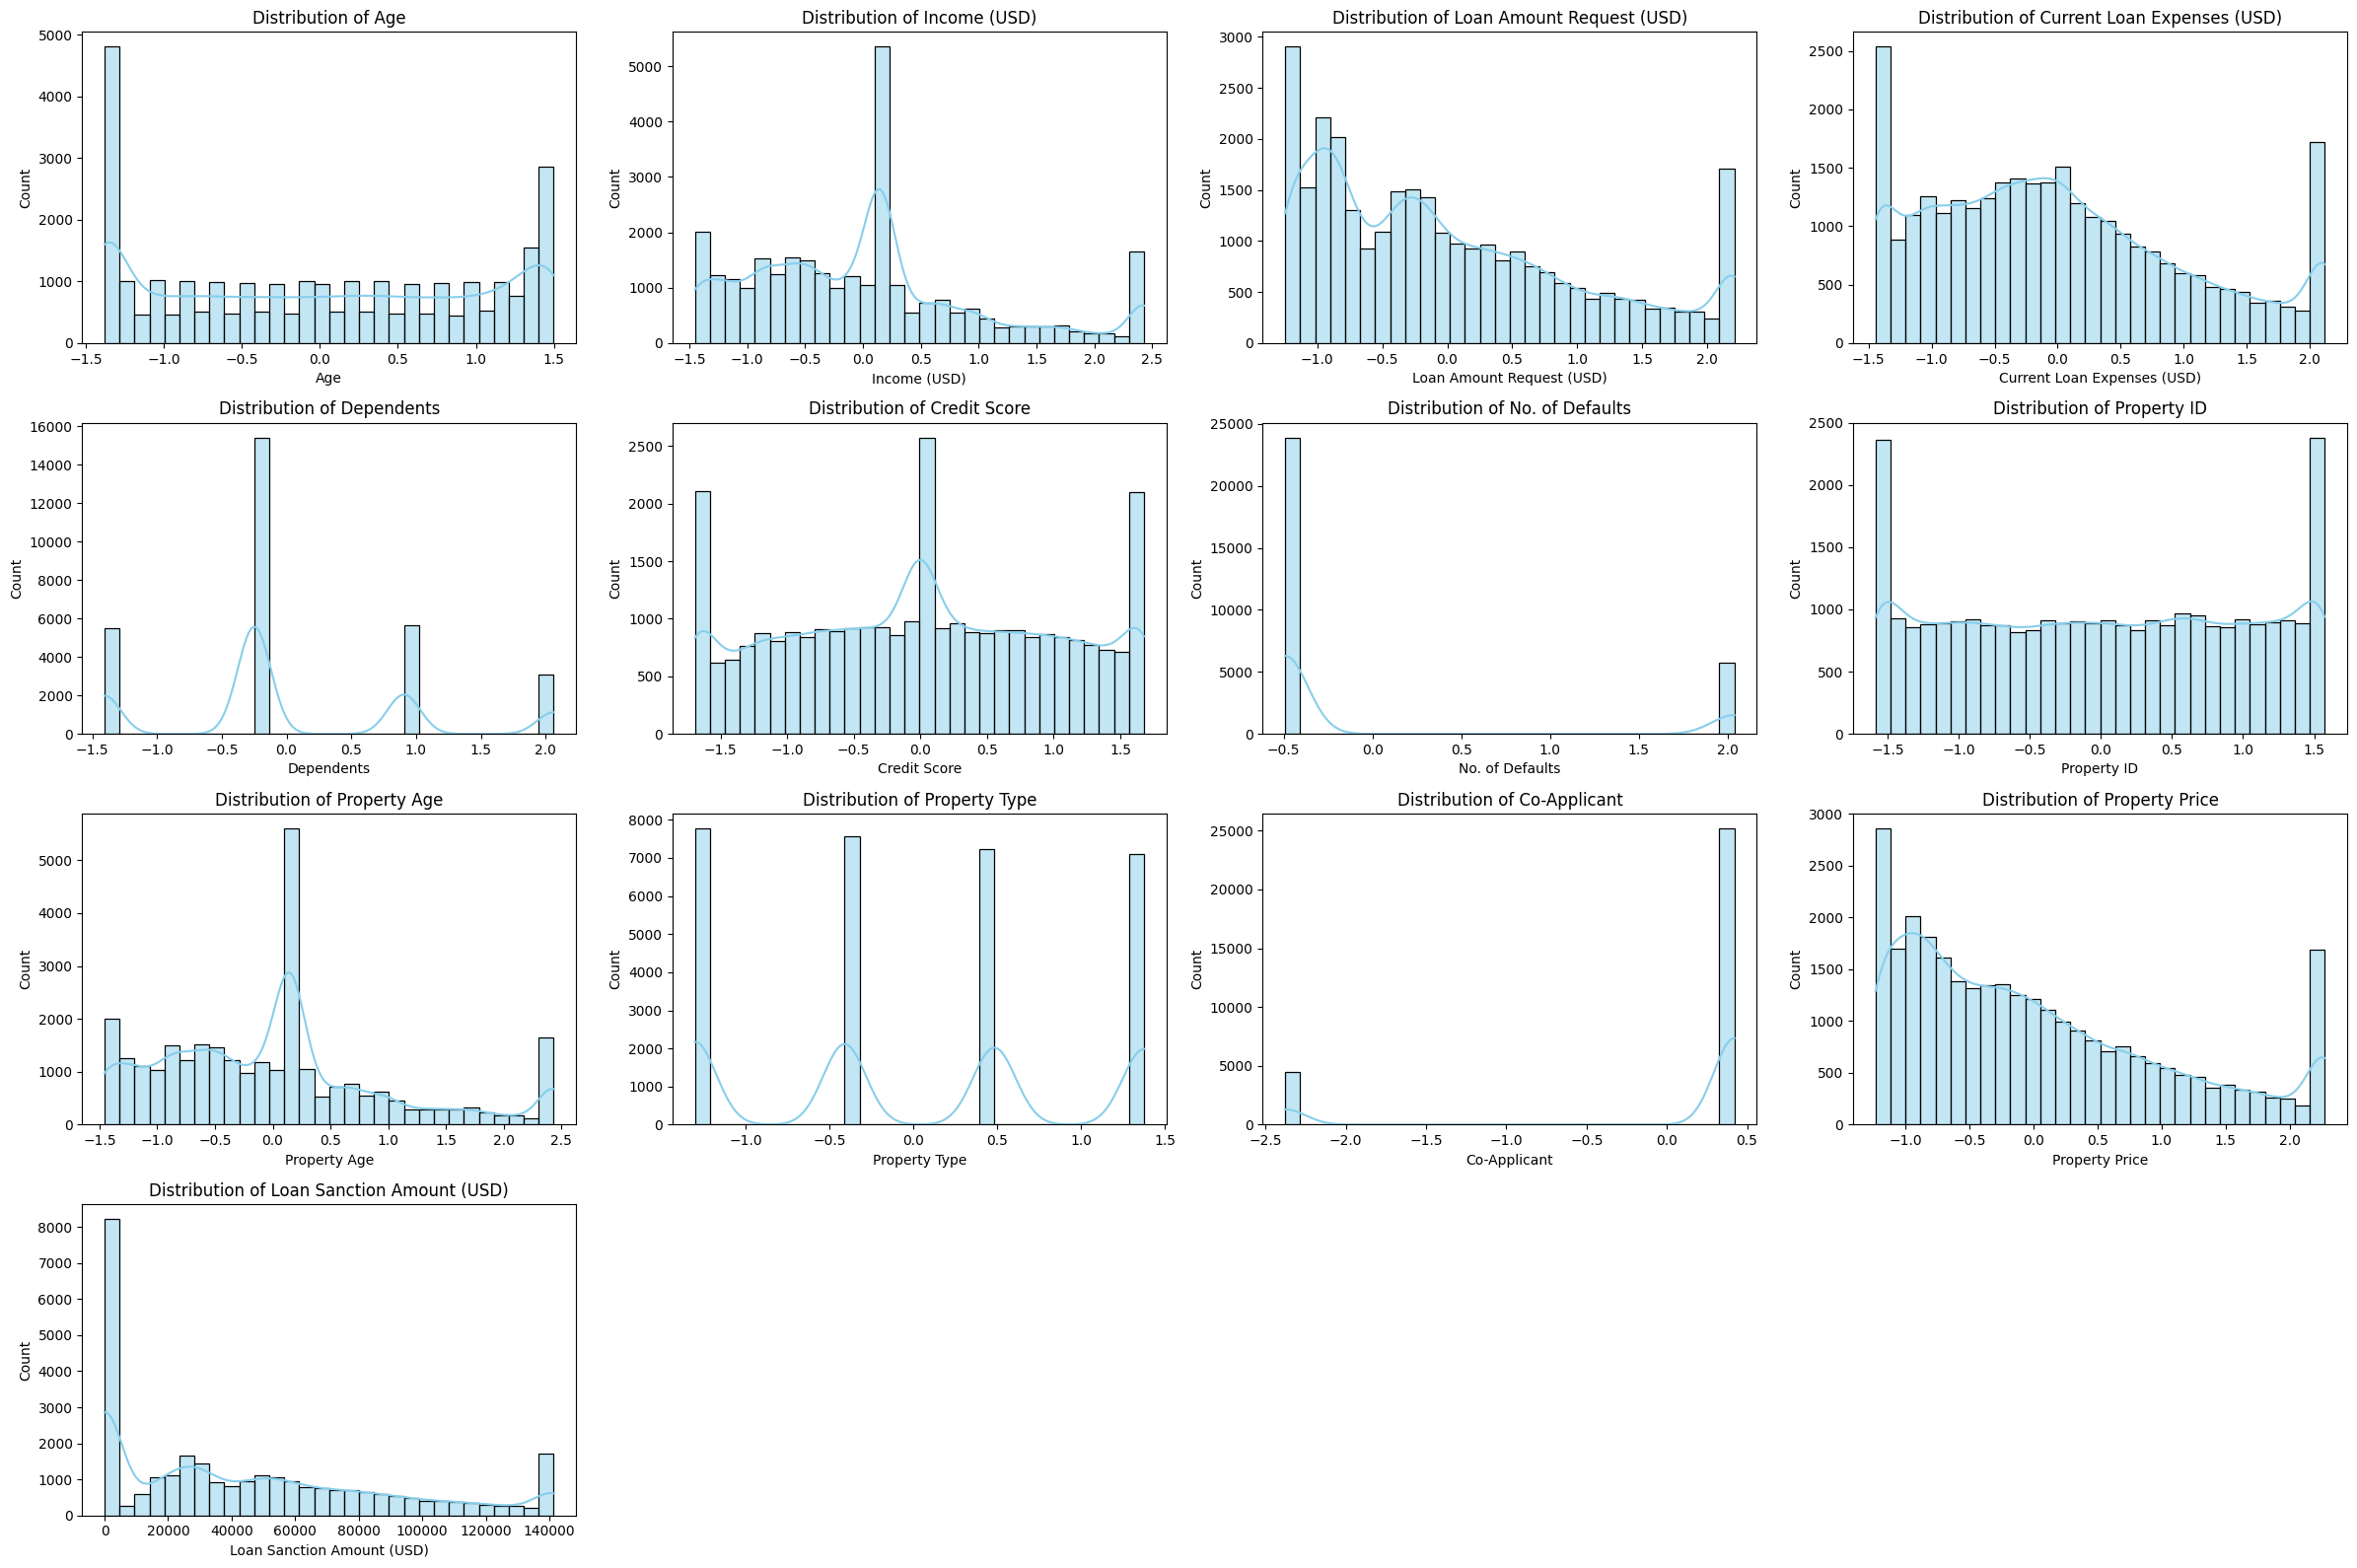

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cols = 4
rows = 4

plt.figure(figsize=(6 * cols, 4 * rows))

for i, col in enumerate(num_cols):
    plt.subplot(rows, cols, i + 1)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


### b. Scatter plots

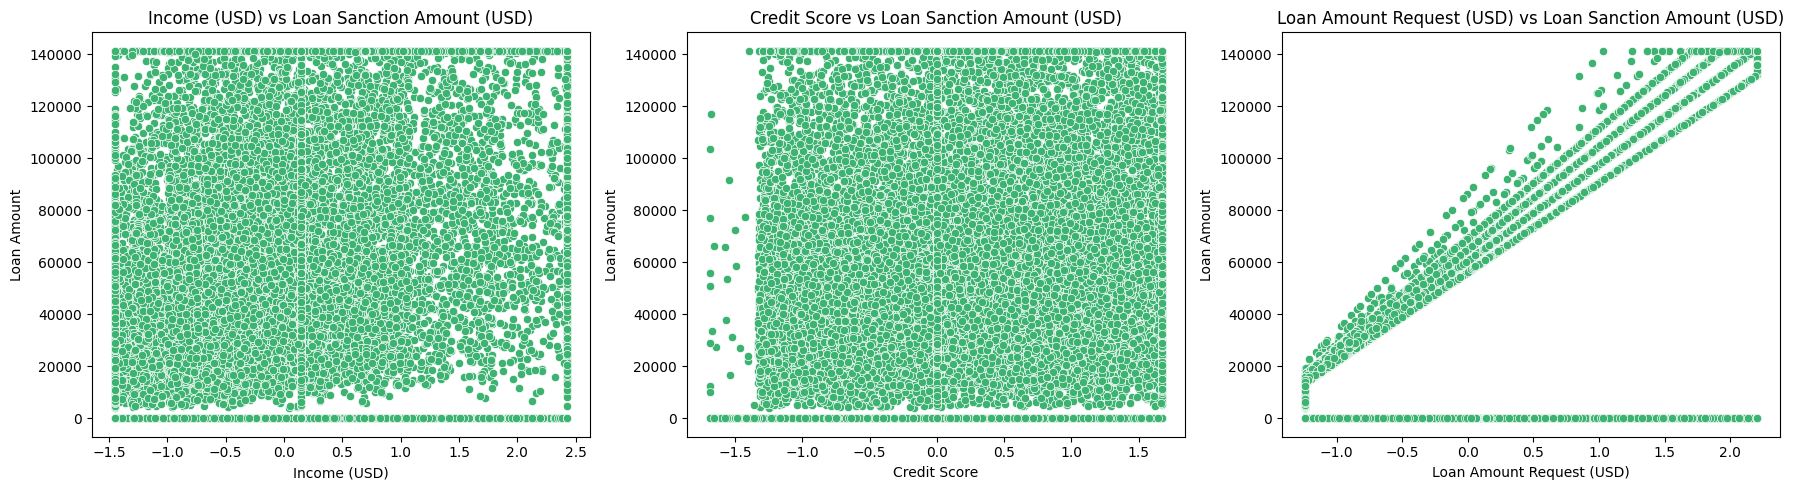

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

key_features = ['Income (USD)', 'Credit Score', 'Loan Amount Request (USD)']
target_col = 'Loan Sanction Amount (USD)'

plt.figure(figsize=(6 * len(key_features), 5))

for i, col in enumerate(key_features):
    plt.subplot(1, len(key_features), i + 1)
    sns.scatterplot(x=df[col], y=df[target_col], color='mediumseagreen')
    plt.title(f'{col} vs {target_col}')
    plt.xlabel(col)
    plt.ylabel('Loan Amount')

plt.tight_layout()
plt.show()


### c. Correlation Heatmap

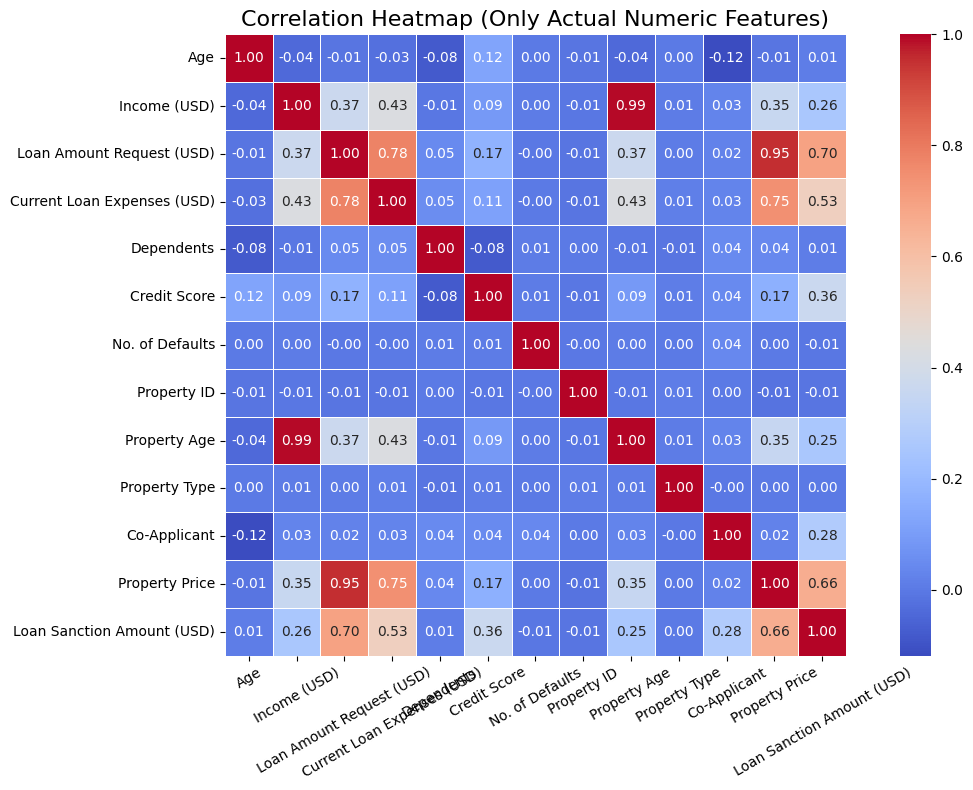

In [69]:
original_cat_cols = ['Gender', 'Income Stability', 'Profession', 'Type of Employment',
                     'Location', 'Expense Type 1', 'Expense Type 2',
                     'Has Active Credit Card', 'Property Location']  # exclude 'Name', 'Customer ID'
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
reliable_num_cols = [col for col in num_cols if col not in original_cat_cols]

# Compute and plot correlation heatmap
corr_matrix = df[reliable_num_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Correlation Heatmap (Only Actual Numeric Features)', fontsize=16)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


# Splitting the Dataset

In [55]:
from sklearn.model_selection import train_test_split

# Separate features and target
df = df.drop(['Customer ID', 'Name'], axis=1)
X = df.drop('Loan Sanction Amount (USD)', axis=1)
y = df['Loan Sanction Amount (USD)']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

print("Train set:", X_train.shape)
print("Validation set:", X_val.shape)
print("Test set:", X_test.shape)


Train set: (20762, 21)
Validation set: (4449, 21)
Test set: (4449, 21)


# Model training and performance metrics

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

model = LinearRegression()
kf = KFold(n_splits=5, shuffle=True, random_state=42)

mae_list, mse_list, rmse_list, r2_list = [], [], [], []
fold = 1
for train_index, val_index in kf.split(X_train):
    X_tr, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_tr, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    model.fit(X_tr, y_tr)
    y_pred = model.predict(X_val_fold)

    mae = mean_absolute_error(y_val_fold, y_pred)
    mse = mean_squared_error(y_val_fold, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_val_fold, y_pred)

    mae_list.append(mae)
    mse_list.append(mse)
    rmse_list.append(rmse)
    r2_list.append(r2)

    print(f"Fold {fold}: MAE={mae:.2f}, MSE={mse:.2f}, RMSE={rmse:.2f}, R²={r2:.2f}")
    fold += 1

cv_results = pd.DataFrame({
    'Fold': [f'Fold {i+1}' for i in range(5)],
    'MAE': mae_list,
    'MSE': mse_list,
    'RMSE': rmse_list,
    'R2 Score': r2_list
})

cv_results.loc['Average'] = cv_results[['MAE', 'MSE', 'RMSE', 'R2 Score']].mean().round(2)
cv_results.loc['Average', 'Fold'] = 'Average'
print("\nCross-Validation Results (K = 5):")
print(cv_results)


Fold 1: MAE=18890.63, MSE=702476122.64, RMSE=26504.27, R²=0.64
Fold 2: MAE=19311.32, MSE=777267591.82, RMSE=27879.52, R²=0.59
Fold 3: MAE=18732.84, MSE=696852179.02, RMSE=26397.96, R²=0.63
Fold 4: MAE=18338.03, MSE=674262768.19, RMSE=25966.57, R²=0.64
Fold 5: MAE=19186.81, MSE=768993353.76, RMSE=27730.73, R²=0.59

Cross-Validation Results (K = 5):
            Fold           MAE           MSE          RMSE  R2 Score
0         Fold 1  18890.631980  7.024761e+08  26504.266122  0.636256
1         Fold 2  19311.322104  7.772676e+08  27879.519218  0.587975
2         Fold 3  18732.837159  6.968522e+08  26397.957857  0.625975
3         Fold 4  18338.026766  6.742628e+08  25966.570205  0.640626
4         Fold 5  19186.811735  7.689934e+08  27730.729413  0.593704
Average  Average  18891.930000  7.239704e+08  26895.810000  0.620000


In [59]:
model = LinearRegression()
model.fit(X_train, y_train)
y_val_pred = model.predict(X_val)

mae_val = mean_absolute_error(y_val, y_val_pred)
mse_val = mean_squared_error(y_val, y_val_pred)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(y_val, y_val_pred)

print("Validation Set Performance:")
print(f"MAE: {mae_val:.2f}, MSE: {mse_val:.2f}, RMSE: {rmse_val:.2f}, R²: {r2_val:.2f}")


Validation Set Performance:
MAE: 18926.46, MSE: 731186370.50, RMSE: 27040.46, R²: 0.61


In [60]:
y_test_pred = model.predict(X_test)

mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

print("Test Set Performance:")
print(f"MAE: {mae_test:.2f}, MSE: {mse_test:.2f}, RMSE: {rmse_test:.2f}, R²: {r2_test:.2f}")


Test Set Performance:
MAE: 19022.77, MSE: 743473629.75, RMSE: 27266.71, R²: 0.60


# Visualise the Results

Actual vs Predicted plot

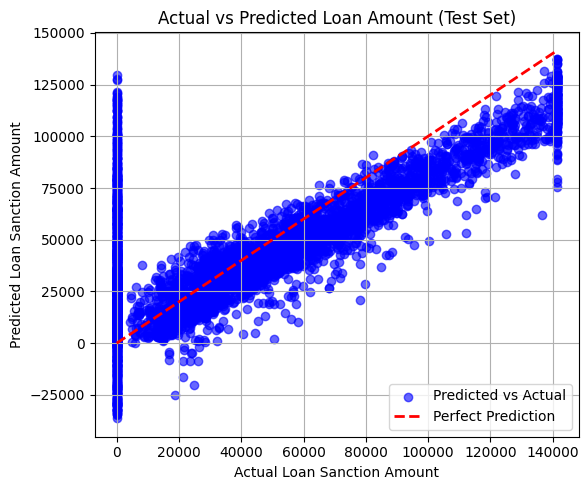

In [67]:
import matplotlib.pyplot as plt

# Actual vs Predicted (Test Set)
plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_test_pred, alpha=0.6, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Loan Sanction Amount')
plt.ylabel('Predicted Loan Sanction Amount')
plt.title('Actual vs Predicted Loan Amount (Test Set)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Residual Plot

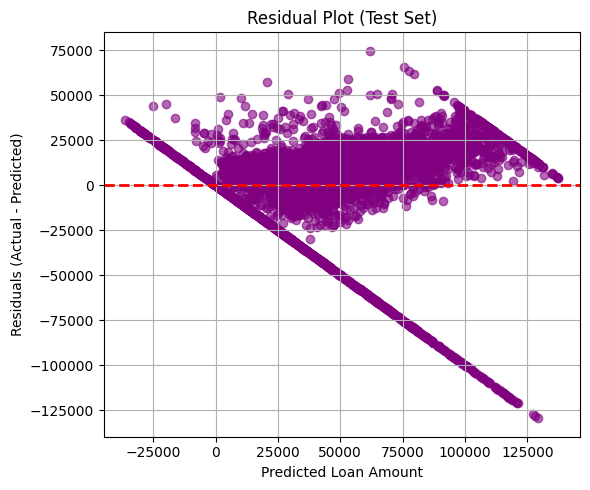

In [66]:
residuals = y_test - y_test_pred
plt.figure(figsize=(6, 5))
plt.scatter(y_test_pred, residuals, alpha=0.6, color='purple')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Loan Amount')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot (Test Set)')
plt.grid(True)
plt.tight_layout()
plt.show()


Bar Plot of Feature Coefficients

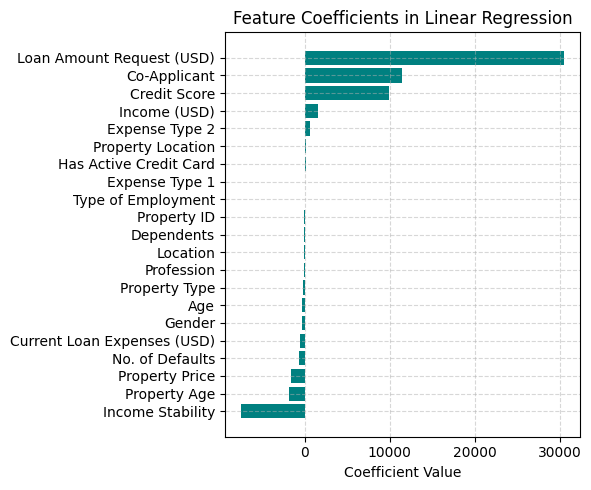

In [65]:
feature_names = X_train.columns
coefficients = model.coef_
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(6, 5))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='teal')
plt.xlabel('Coefficient Value')
plt.title('Feature Coefficients in Linear Regression')
plt.gca().invert_yaxis()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()